<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


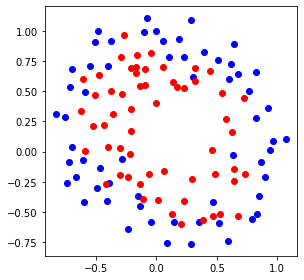

0.06495354585299995
-0.006028551971999807
-0.24395782730000026
0.09571936169999984
-0.2310532462999999
0.3792274753000002
0.9676718045730001
1.1366495193
1.003850566925
0.6009542295000001
-0.08262869370000003
-0.37865272919999987
0.006347569199999709
-0.2935896432999998
0.21151603470000002
0.3904769199999998
0.6524719023000001
-0.5494098247230002
-0.1969805655000001
-0.7436739482999998
-1.0916829497
-0.2924635132000003
0.3793775175029998
0.8177481467999999
1.0215032554999999
0.19210130449999996
-0.21590165569999975
-1.0151483232999998
0.4579905542999999
-0.8440045397000004
-1.7742450987000002
-0.6537270736999994
0.018815605299999927
0.4269290172999999
0.6615704456999997
1.189459990533
1.2212612103000002
1.3905576819999999
1.4044999489880001
0.7617938636999998
1.0472888
0.6556332643
0.16732073930000002
0.915791048263
0.4062322983000002
0.5025556407
-0.2741965477
0.6651119471999998
-0.0954253195000001
0.006422312499999805
0.5432323353000001
1.0170722330651203
0.49498098238800026
0.895260

In [0]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt"

data    = np.genfromtxt(path, delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


# 1. Plot training data
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#********************g 함수 찾기위한 테스트 함수 계산 진행 
def test_func(x,y):
  result = 1.5 - 3*x**2 + 0.1*x + x*y - 3*y**2 
  return result

error1 = 0
error0 = 0

for i in range(len(pointX1)):
  print (test_func(pointX1[i], pointY1[i]))
  if (test_func(pointX1[i], pointY1[i])<0): error1= error1 +1
print("///////////////")
for i in range(len(pointX0)):
  print (test_func(pointX0[i], pointY0[i]))
  if(test_func(pointX0[i], pointY0[i])>0): error0 = error0 +1

print( "point1 error(양수여야되는데 음수) = ", error1)
print("point0 error(음수여야되는데 양수) = ", error0)
print("총 에러 갯수 = ", error1 + error0)


In [0]:
import math
import numpy
from numpy import asarray

#2. g(X,Y;세타) latex 형식으로 wrtie down

#코드 구성 
# (1) g(X,Y;theta) 정의 : 상수 + x**2 + x*y + x + y**2

def g_function( xi, yi, theta ): #theta[]로 안해도됨?********************************************************************
  result = theta[0] + theta[1] * xi**2 + theta[2] * xi + theta[3]*yi + theta[4] * xi * yi + theta[5] *yi**2
  return result

# (2) sigmoid 함수 정의

def sigmoid (input):  # input 은 float type
  return 1 / (1 + math.exp(-input))

# (3) 배열, 변수 정의


row = 118 # 행 갯수
column = 6 # 열 갯수
BJ = 0 # training accuracy 계산시 사용할 분자값
a = 0.03 # learning rate , 알파 대신 a 씀
numOfData = len(pointX) # 데이터 개수, 트레이닝 횟수 , 이터레이션 횟수 = 118
g = 0 # g_function result값 넣을 변수
final_Accuracy = 0

defender = 1e-5 # 도메인에러 방지

cost_List = [] # cost function (Objective function) 결과값 넣을 배열 
training_Accuracy = [] #Training accuracy 넣을 배열
theta_Array = [[0 for i in range(column)] for j in range(row)] #업데이트한 theta값 넣을 2차원배열 118행 6열(세타 0~세타5)
sigmoid_Array = [] #Gradient Descent할 때 쓰이는 시그모이드식 넣을 배열
temp = [] # cost 값 계산할때 평균 구할 array / temp.mean()해서 cost_List에 하나씩 넣을거임

# 세타 초기값 임의 설정
theta_Array[0][0] = 1.5 #상수
theta_Array[0][1] = -3 #X제곱
theta_Array[0][2] =  0.1 # X
theta_Array[0][3] = 0.1  # Y
theta_Array[0][4] = -1 # XY
theta_Array[0][5] = 3 # Y제곱

print(theta_Array)

# (4) cost function (objective fuction) 디자인

for j in range(numOfData) :
  temp.clear() # 매 이터레이션마다 임시 어레이 초기화
  sigmoid_Array.clear() # 매 이터레이션마다 수식에 쓸 어레이 초기화
  BJ = 0 # 매 이터레이션마다 분자 0으로 초기화
  
  for i in range(numOfData) : # i : 0 ~ 117
  
    g = g_function(pointX[i], pointY[i], theta_Array[j]) # 출력 에러 없음 확인
    temp.append(-label[i] * math.log(sigmoid(g) + defender) - (1 - label[i]) * math.log( 1 - sigmoid(g) + defender) ) # math domain error 아마도 0일때가 있어서 그런듯? defender활용
    sigmoid_Array.append(sigmoid(g))

    #print("i=", i, " sigmoid(g) = ", sigmoid(g) )
    #print("math.log(sigmoid(g) = ", math.log(sigmoid(g)))
    #print("math.log(sigmoid(g)+defender = ", math.log(sigmoid(g) +defender))
    #print("math.log(1-sigmoid(g)+defender) = ", math.log( 1 - sigmoid(g) + defender))
    if ( (label[i] == 1) & (g > 0.5)) : BJ = BJ + 1
    elif ( (label[i] == 0) & (g < 0.5 )) : BJ = BJ + 1

  print(g) 
  cost_List.append(asarray(temp).mean()) # cost_List[j] 채우기
  training_Accuracy.append( BJ/numOfData ) # training_Accuracy[j] 채우기
  


  # theta값들 업데이트 / 여기 체크하기
  if (j == numOfData - 1) : break

  theta_Array[j+1][0] = (theta_Array[j][0] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))
  theta_Array[j+1][1] = (theta_Array[j][1] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointX[j]*pointX[j]
  theta_Array[j+1][2] = (theta_Array[j][2] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointX[j]
  theta_Array[j+1][3] = (theta_Array[j][3] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointY[j]
  theta_Array[j+1][4] = (theta_Array[j][4] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointX[j]*pointY[j]
  theta_Array[j+1][5] = (theta_Array[j][4] - a*((asarray(sigmoid_Array) - asarray(label)).mean()))*pointY[j]*pointY[j]
  


#print(final_Accuracy)
print(max(training_Accuracy))



[[1.5, -3, 0.1, 0.1, -1, 3], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0

#1. plot training data

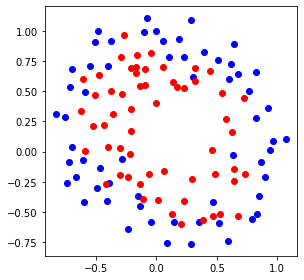

In [0]:
# 1. Plot training data
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#2. Wite down g( x , y ; theta) by LaTeX

In [0]:
# latex이용해서 수식 작성하는법 **************

#3. plot the training error

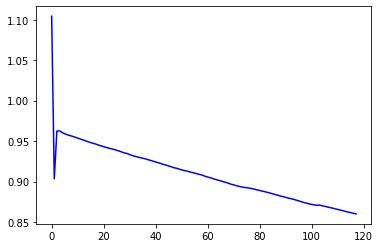

In [0]:
plt.figure()
plt.plot([i for i in range(len(cost_List))],cost_List,color='blue')

#4. plot the training accuracy

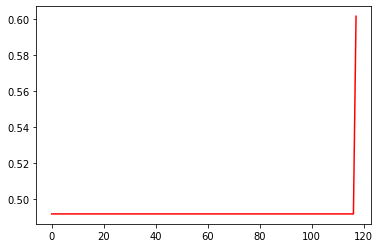

In [0]:
plt.plot([i for i in range(len(training_Accuracy))],sorted(training_Accuracy),color='red')

#5. Write down the final training Accuracy